<div class="alert alert-block alert-info">

- [Import the needed libraries](#1nd-bullet)<br>
- [Import the dataset](#2nd-bullet)<br>
- [Feature Selection](#3rd-bullet)<br>    
    - [Filter methods](#4th-bullet)<br>
        - [Univariate variables](#5th-bullet)<br>
        - [Spearman Correlation](#6th-bullet)<br>
        - [Mutual Information Classification](#7th-bullet)<br>
        - [Variance Inflation Factor (VIF)](#8th-bullet)<br>
    - [Wrapper Methods](#9th-bullet)<br>
        - [Boruta with XGBoostClassifier.](#10th-bullet)<br>
        - [RFE XGBoostClassifier.](#11th-bullet)<br>
    - [Embedded Methods](#12th-bullet)<br>
        - [Lasso](#13th-bullet)<br>
- [Final Insights](#14th-bullet)<br>
    
</div>

<a class="anchor" id="1nd-bullet">

### Import the needed libraries
    
</a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots

# data partition
from sklearn.model_selection import train_test_split


#filter methods
# spearman correlation
import scipy.stats as stats

#wrapper methods

from sklearn.feature_selection import  RFECV
from xgboost import XGBClassifier

# Label encoding
from sklearn.preprocessing import LabelEncoder

# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif, SelectKBest  # mutual information is a embedded method for regression problems

# model assessment
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')


<a class="anchor" id="2nd-bullet">

### Import the dataset
    
</a>

In [ ]:

# Import a smaller portion of the data
preproc_train = pd.read_csv('traindf (2).csv')
preproc_val = pd.read_csv('valdf (2).csv')
preproc_test = pd.read_csv('testdf (2).csv')

In [ ]:


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training data
label_encoder.fit(preproc_train['Claim Injury Type'])

# Copy Claim Injury Type as y variable
y = preproc_train['Claim Injury Type'].copy()
y_val = preproc_val['Claim Injury Type'].copy()

# Drop original column from X
X_preproc_train = preproc_train.drop('Claim Injury Type', axis=1)
X_preproc_val = preproc_val.drop('Claim Injury Type', axis=1)


# Transform the 'Claim Injury Type' column in both training and validation sets
preproc_train['Claim Injury Type'] = label_encoder.transform(preproc_train['Claim Injury Type'])
preproc_val['Claim Injury Type'] = label_encoder.transform(preproc_val['Claim Injury Type'])



In [ ]:
y_preproc_train = preproc_train['Claim Injury Type']
X_preproc_train = preproc_train.drop(['Claim Injury Type'], axis=1)

y_preproc_val = preproc_val['Claim Injury Type']
X_preproc_val = preproc_val.drop(['Claim Injury Type'], axis=1)

In [ ]:
X_preproc_train.shape, X_preproc_val.shape

((459220, 43), (114805, 43))

In [ ]:

# #passar o claim identifier para o index

# y_preproc_train_copy = y_preproc_train.copy()

# y_preproc_train.set_index('Claim Identifier', inplace=True)

# y_preproc_val.set_index('Claim Identifier', inplace=True)

# X_preproc_train.set_index('Claim Identifier', inplace=True)

# preproc_test.set_index('Claim Identifier', inplace=True)

# X_preproc_val.set_index('Claim Identifier', inplace=True)


In [ ]:
# drop Accident Month and Accident Day

X_preproc_train.drop(columns=['Accident Month', 'Accident Day'], inplace=True)
X_preproc_val.drop(columns=['Accident Month', 'Accident Day'], inplace=True)
preproc_test.drop(columns=['Accident Month', 'Accident Day'], inplace=True)

In [ ]:
col_fill_median = ['Accident Month Cos', 'Accident Month Sin', 'Accident Day Cos', 'Accident Day Sin']

for col in col_fill_median:
    median_value = X_preproc_train[col].median()

    X_preproc_train[col].fillna(median_value, inplace=True)
    X_preproc_val[col].fillna(median_value, inplace=True)
    preproc_test[col].fillna(median_value, inplace=True)



In [ ]:
#check for nan values
X_preproc_train.isna().sum().sort_values()

,0
Assembly Date,0
Above_65,0
Accident Month Sin,0
Accident Month Cos,0
Accident Day Sin,0
Accident Day Cos,0
Received_C2,0
Received_C3,0
Hearing_held,0
Attorney/Representative_Y,0


<div class="alert alert-block alert-success">

<a class="anchor" id="3rd-bullet">    
    
## Feature Selection
    
</a>
    
</div>

<a class="anchor" id="4th-bullet">

## Filter methods
    
</a>

<a class="anchor" id="5th-bullet">

### Univariate variables
    
</a>

Check if any of the numerical variables is univariate (variance is equal to 0), then drop those variables if any of those exist.

from this we can tell that, there are no categorical features

In [ ]:
X_preproc_train.var().sort_values()

,0
Alternative Dispute Resolution_Y,0.004483
Under_20,0.015444
Received_C2,0.024602
Days_to_Assembly,0.029170
Above_65,0.036877
Agreement Reached,0.044311
COVID-19 Indicator_Y,0.045801
high_risk_body,0.047649
high_risk_cause,0.101894
high_risk_nature,0.116881


No feature to be dropped from this one

<a class="anchor" id="6th-bullet">

### Spearman Correlation
    
</a>

### Dropping Binary and Cyclic Encoded Features

In [ ]:
#drop binary columns
continuous_features = X_preproc_train.drop(columns=['COVID-19 Indicator_Y', 'Alternative Dispute Resolution_Y', 'Gender_M', 'high_risk_nature', 'Received_C2','Under_20', 'Age_21_40', 'Age_41_65', 'Age_41_65','Received_C3', 'Hearing_held', 'Attorney/Representative_Y', 'high_risk_body', 'high_risk_cause', 'market_indicator', 'Agreement Reached', 'Days_to_Assembly', "Accident Day Cos", 'Accident Day Sin', 'Accident Month Cos', 'Accident Month Sin'])

In [ ]:
# round to 1 decimal places
continuous_features = continuous_features.round(1)
def cor_heatmap(cor):
    plt.figure(figsize=(24,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.2f')
    plt.show()

In [ ]:

cor_spearman = continuous_features.corr(method ='spearman')
cor_spearman

,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,...,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Accident Year,Above_65,wcio_pca1,wcio_pca2,region_cluster
Assembly Date,1.000000,0.035011,-0.079147,0.973649,0.100434,0.023874,-0.030656,-0.004726,-0.006443,0.384974,...,0.042801,0.017750,-0.028987,-0.086318,-0.000017,-0.903872,-0.005361,-0.052774,-0.085729,-0.006875
Average Weekly Wage,0.035011,1.000000,-0.108808,0.013797,-0.398465,0.130524,-0.079759,0.076999,0.055514,-0.001769,...,0.057416,0.063267,0.104584,0.106551,0.002350,-0.010892,-0.001526,0.142490,0.034329,0.015342
Birth Year,-0.079147,-0.108808,1.000000,-0.081746,0.099392,0.015035,0.042513,-0.026018,-0.014037,-0.030123,...,-0.056141,-0.054275,-0.028695,-0.012119,-0.001730,0.091822,-0.331431,-0.052017,0.025818,0.003402
C-2 Date,0.973649,0.013797,-0.081746,1.000000,0.119093,0.011265,-0.025291,-0.016145,-0.019271,0.379893,...,0.029207,0.017551,-0.034157,-0.086875,0.000216,-0.891941,-0.004420,-0.058984,-0.086103,-0.013684
C-3 Date,0.100434,-0.398465,0.099392,0.119093,1.000000,-0.094803,0.079554,-0.141951,-0.140668,0.074283,...,-0.002201,-0.028517,-0.024602,-0.072086,0.001693,-0.083497,-0.005041,-0.057289,-0.041873,-0.063481
Carrier Name,0.023874,0.130524,0.015035,0.011265,-0.094803,1.000000,-0.278441,0.026423,0.080098,0.005318,...,0.129221,0.048824,0.073623,0.034938,-0.001259,-0.018869,-0.021592,0.083948,-0.008677,0.030221
Carrier Type,-0.030656,-0.079759,0.042513,-0.025291,0.079554,-0.278441,1.000000,0.038734,0.023056,-0.000982,...,-0.259938,-0.053993,-0.071361,-0.035727,0.000588,0.027850,0.014136,-0.073672,0.001656,0.008415
County of Injury,-0.004726,0.076999,-0.026018,-0.016145,-0.141951,0.026423,0.038734,1.000000,0.428727,0.022076,...,0.019961,-0.002912,-0.028330,-0.015361,0.000722,-0.003078,0.006155,-0.027741,-0.008117,0.432325
District Name,-0.006443,0.055514,-0.014037,-0.019271,-0.140668,0.080098,0.023056,0.428727,1.000000,0.008002,...,0.063421,0.003249,-0.026847,-0.009736,-0.000982,0.000528,-0.005756,-0.021654,-0.006279,0.271876
First Hearing Date,0.384974,-0.001769,-0.030123,0.379893,0.074283,0.005318,-0.000982,0.022076,0.008002,1.000000,...,0.007157,0.004742,-0.039375,-0.069537,-0.001528,-0.366667,0.002301,-0.054721,-0.062347,0.005914


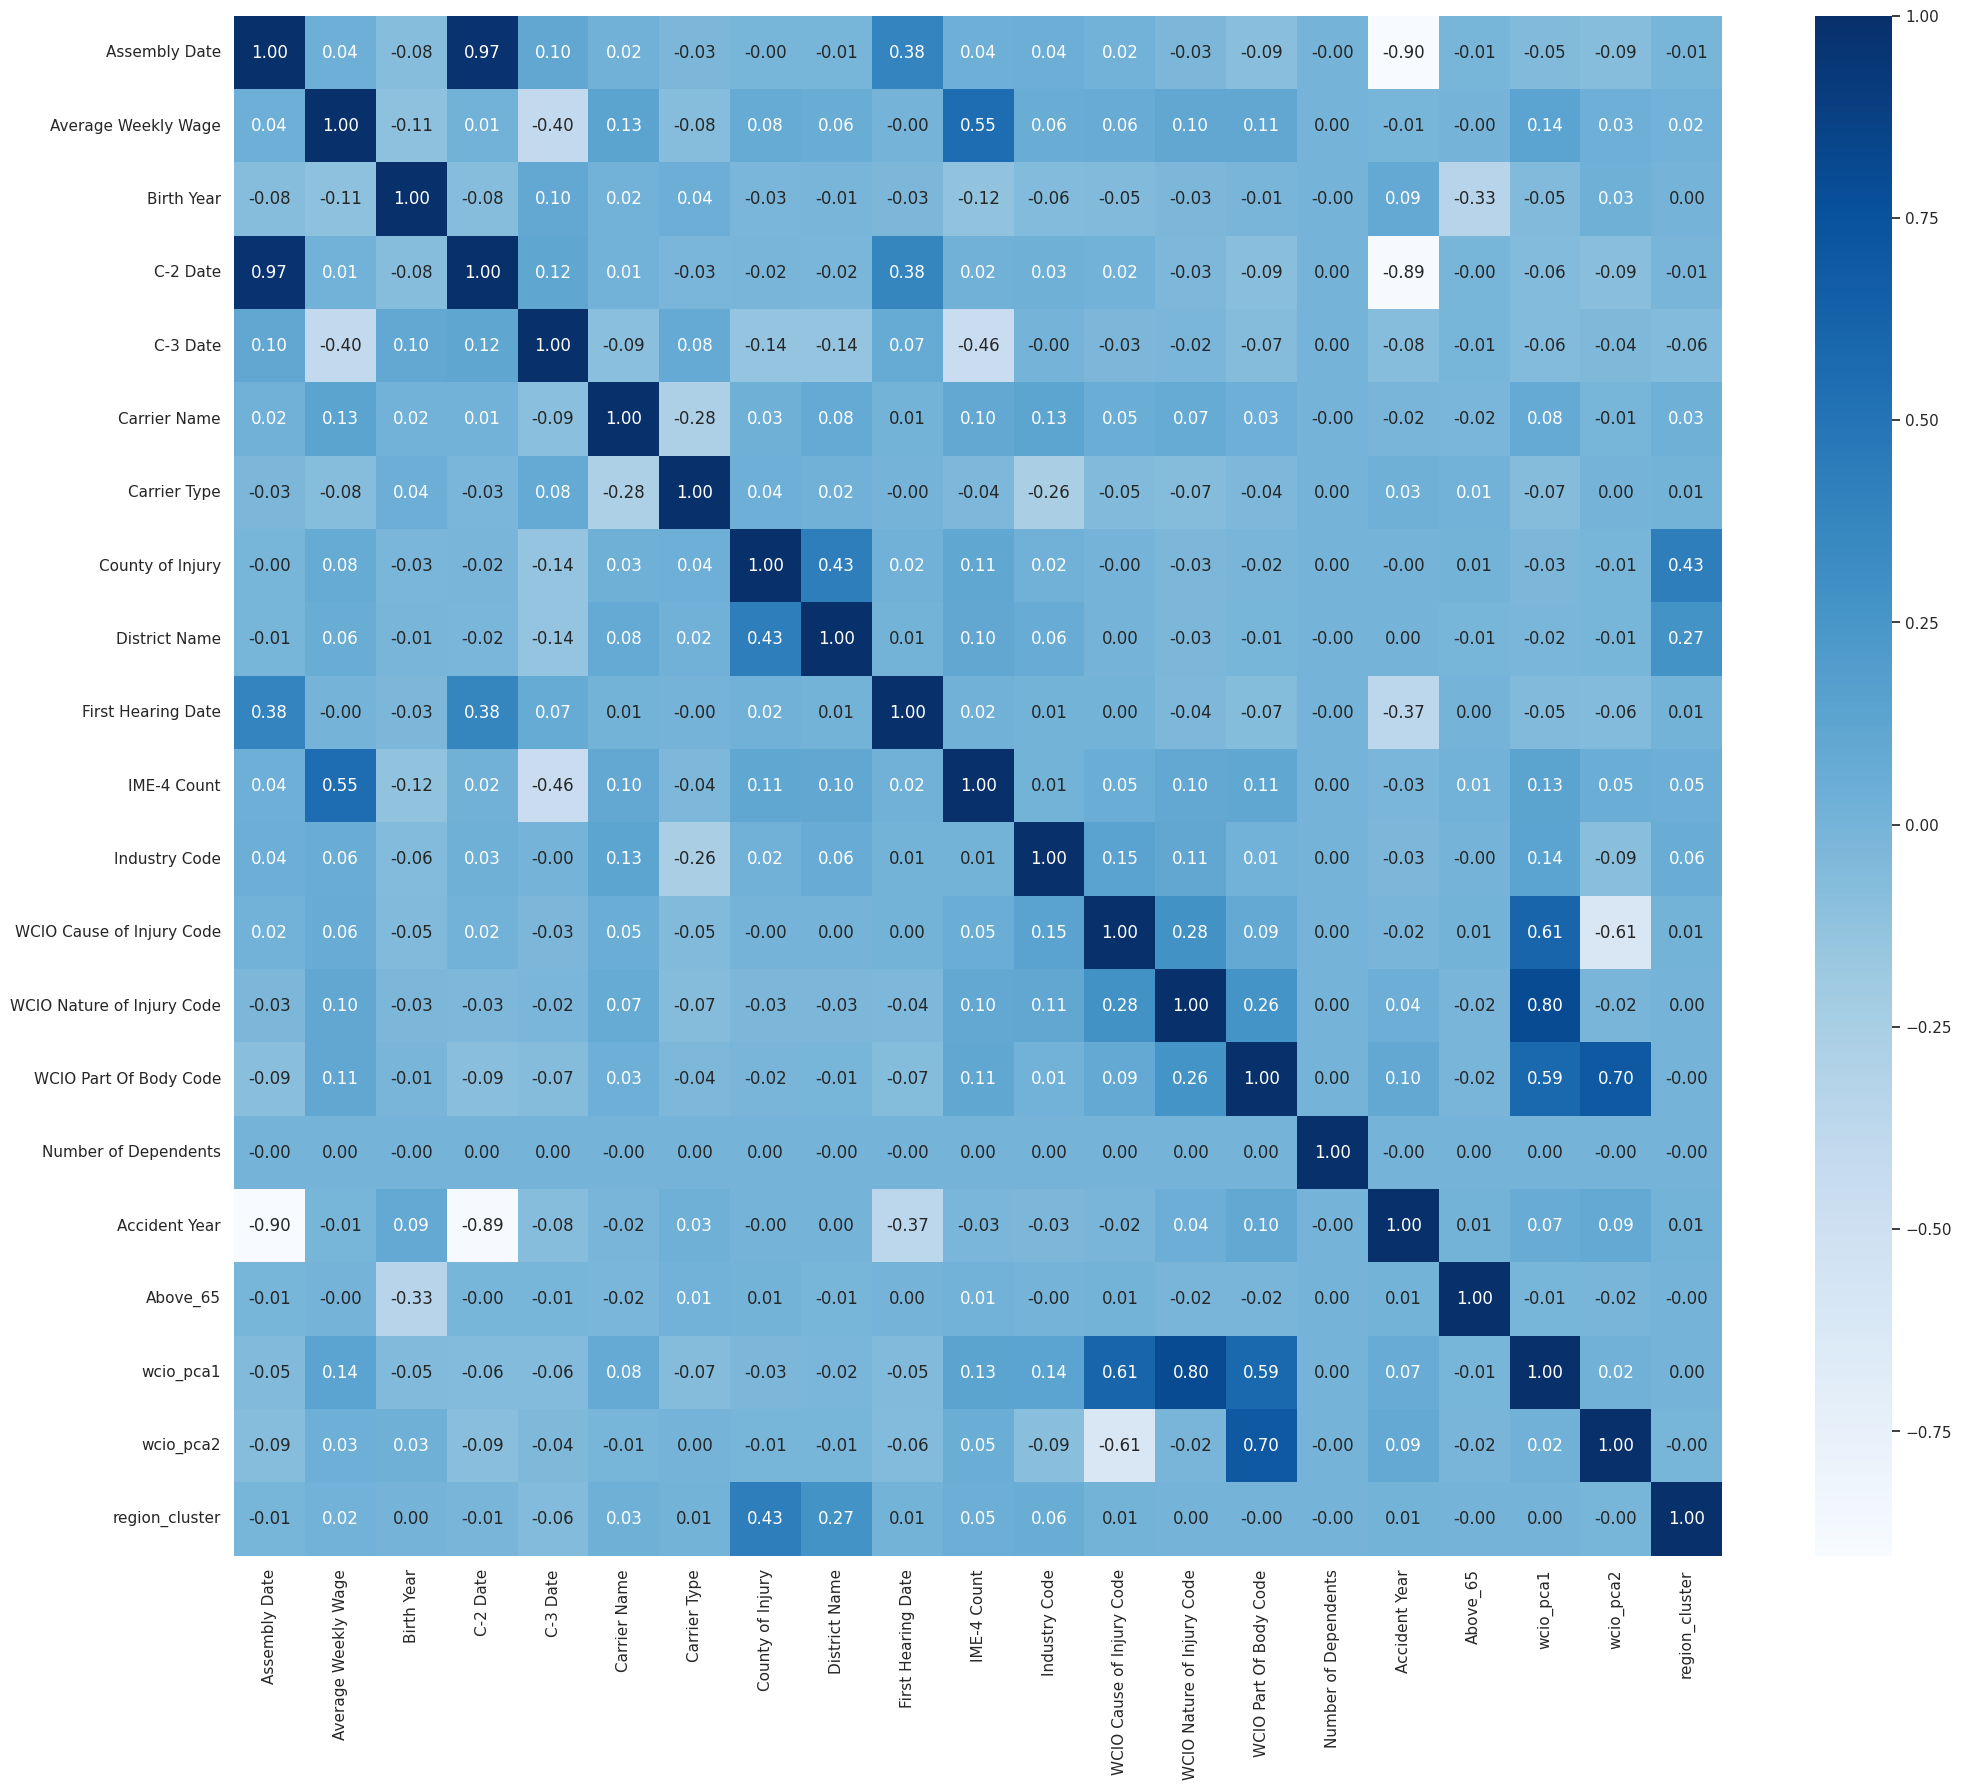

In [ ]:
cor_heatmap(cor_spearman)


We will assume that the Thresholds for feature relevance is 0.2 and redundance for 0,8


### Redundancy
drop 'wcio_pca1' or 'WCIO Nature of Injury Code'

drop 'c2 date' or 'Assembly date'


### Relevance

Drop Number of depndents

Drop Industry code

Drop Birth Year






<a class="anchor" id="7th-bullet">

### Mutual Information Classification
    https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.SelectKBest.html
    https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.mutual_info_regression.html
</a>

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(12,8))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

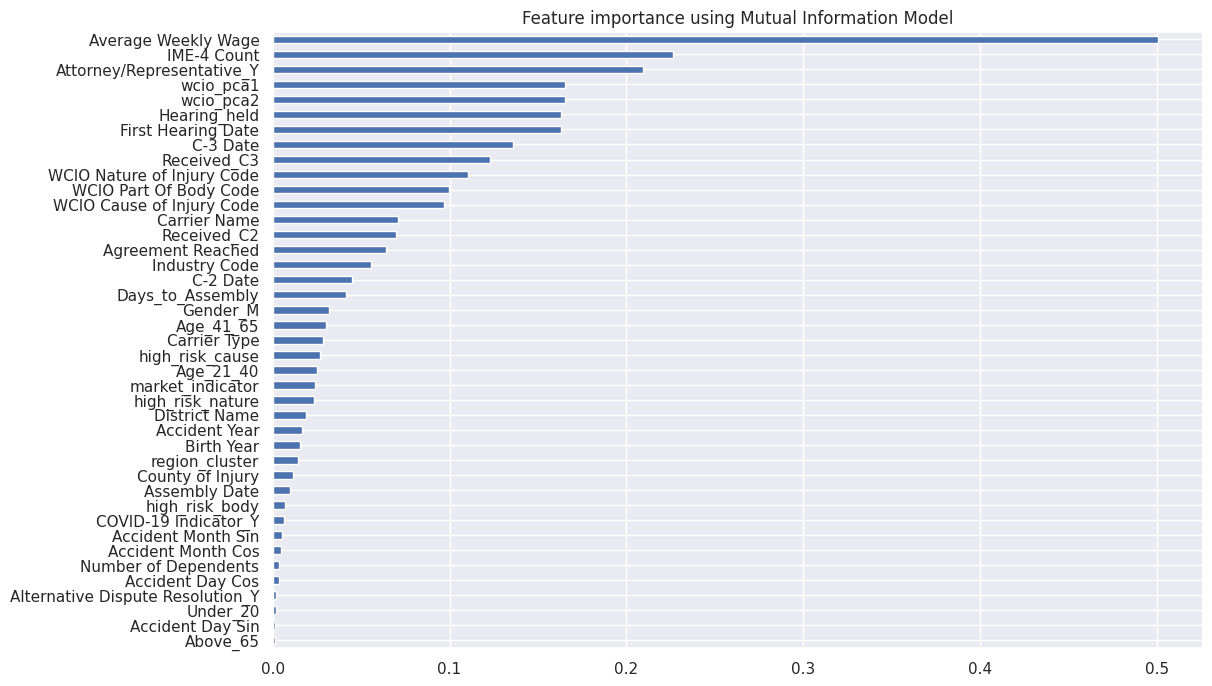

18Features to be eliminated:
Features to be eliminated: 
Index(['Assembly Date', 'Birth Year', 'County of Injury', 'District Name',
       'Number of Dependents', 'Accident Year', 'Under_20', 'Above_65',
       'Accident Month Sin', 'Accident Month Cos', 'Accident Day Sin',
       'Accident Day Cos', 'COVID-19 Indicator_Y',
       'Alternative Dispute Resolution_Y', 'region_cluster',
       'high_risk_nature', 'high_risk_body', 'market_indicator'],
      dtype='object')
Feature                        Score     
----------------------------------------
Assembly Date                  0.0100    
Average Weekly Wage            0.5009    
Birth Year                     0.0154    
C-2 Date                       0.0448    
C-3 Date                       0.1359    
Carrier Name                   0.0710    
Carrier Type                   0.0284    
County of Injury               0.0114    
District Name                  0.0187    
First Hearing Date             0.1629    
IME-4 Count           

In [ ]:
#  Mutual Information Regression for feature selection in regression problems
mic = SelectKBest(score_func= mutual_info_classif, k= 'all')

# fit the model to the training data
mic.fit(X_preproc_train, y_preproc_train)

# get the scores of the features
mic_scores = pd.Series(mic.scores_, index = X_preproc_train.columns)

# plot the scores
plot_importance(mic_scores,'Mutual Information')
mic_scores.sort_values()

#print the features that were eliminated

eliminated_features = mic_scores[mic_scores <= 0.0243].index
print(f"{len(eliminated_features)}Features to be eliminated:")
print(f"Features to be eliminated: \n{eliminated_features}")
# Print formatted table
print(f"{'Feature':<30} {'Score':<10}")
print("-" * 40)
for feature, score in mic_scores.items():
    print(f"{feature:<30} {score:<10.4f}")



   
### Dropping the ones with importance lower than their supposed contribution :



<a class="anchor" id="8th-bullet">

### VIF Variance Information

</a>


Strict threshold (5):
Features to drop: 7
Features: ['Age_41_65', 'Age_21_40', 'market_indicator', 'high_risk_nature', 'high_risk_cause', 'COVID-19 Indicator_Y', 'Received_C3']

Moderate threshold (10):
Features to drop: 3
Features: ['Age_41_65', 'Age_21_40', 'market_indicator']

Lenient threshold (20):
Features to drop: 0
Features: []


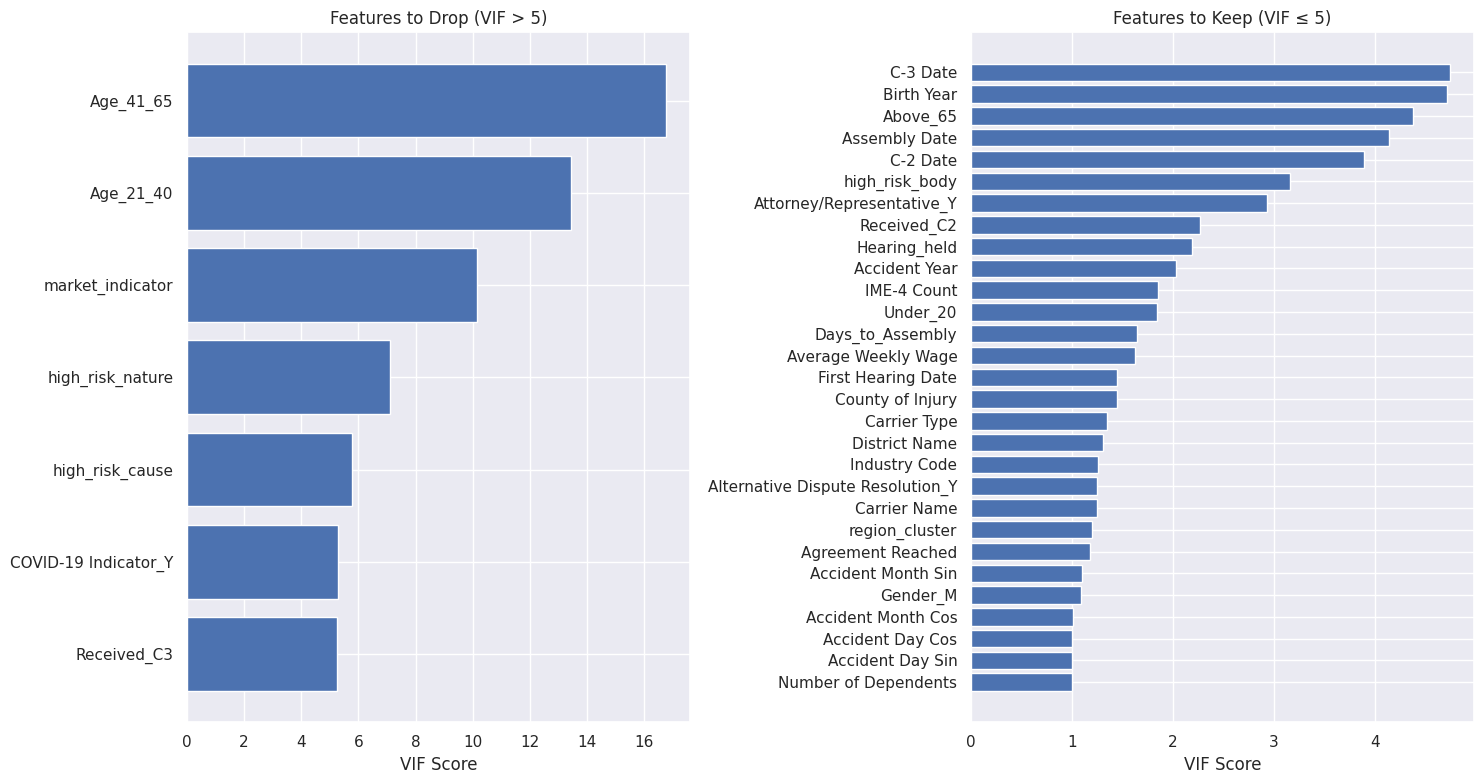

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_vif(X):
   vif_data = pd.DataFrame()
   vif_data["Feature"] = X_preproc_train.columns
   vif_data["VIF"] = [_calculate_vif(X, i) for i in range(X_preproc_train.shape[1])]
   return vif_data.sort_values('VIF', ascending=False)

def _calculate_vif(X, i):
   y = X.iloc[:, i]
   X_other = X_preproc_train.drop(X.columns[i], axis=1)
   model = LinearRegression()
   model.fit(X_other, y)
   r_squared = model.score(X_other, y)
   if r_squared == 1:
       return float('inf')
   return 1 / (1 - r_squared)

# Calculate VIF
vif_df = calculate_vif(X_preproc_train)

# Common thresholds
vif_thresholds = {
    'strict': 5,    # Remove VIF > 5
    'moderate': 10, # Remove VIF > 10
    'lenient': 20   # Remove VIF > 20
}

# Get features to drop
def get_vif_features(vif_df, threshold):
    return vif_df[vif_df['VIF'] > threshold]['Feature'].tolist()

# Remove infinite VIFs first
features_to_drop = vif_df[vif_df['VIF'].isin([float('inf')])]['Feature'].tolist()

# Print features to drop at each threshold
for name, threshold in vif_thresholds.items():
    features = get_vif_features(vif_df[vif_df['VIF'] != float('inf')], threshold)
    print(f"\n{name.title()} threshold ({threshold}):")
    print(f"Features to drop: {len(features)}")
    print(f"Features: {features}")

# Get all features with finite VIF scores, sorted
vif_df_finite = vif_df[vif_df['VIF'] != float('inf')].sort_values('VIF', ascending=True)

# Features to drop (VIF > 5)
features_to_drop = get_vif_features(vif_df_finite, 5)

# Features to keep (VIF <= 5)
features_to_keep = vif_df_finite[vif_df_finite['VIF'] <= 5]['Feature'].tolist()

# Save both lists to CSV
pd.DataFrame({
   'features_to_drop': pd.Series(features_to_drop),
   'features_to_keep': pd.Series(features_to_keep)
}).to_csv('fs1.csv', index=False)

import matplotlib.pyplot as plt

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot features to drop
vif_drop = vif_df_finite[vif_df_finite['VIF'] > 5]
ax1.barh(vif_drop['Feature'], vif_drop['VIF'])
ax1.set_title('Features to Drop (VIF > 5)')
ax1.set_xlabel('VIF Score')

# Plot features to keep
vif_keep = vif_df_finite[vif_df_finite['VIF'] <= 5]
ax2.barh(vif_keep['Feature'], vif_keep['VIF'])
ax2.set_title('Features to Keep (VIF ≤ 5)')
ax2.set_xlabel('VIF Score')

plt.tight_layout()
plt.show()

<a class="anchor" id="9th-bullet">

## Wrapper Methods
    
</a>

RFE was dropped from our decisionmaking process due to being computationally difficult to run and in our perspective being inferior to Boruta which can detect non-linear relationships better

<a class="anchor" id="10th-bullet">

### RFE XGBoosting
    
</a>

In [ ]:
# #number of features
# nof_list= np.arange(1, 42)
# high_score=0

# #Variable to store the optimum features
# nof=0
# train_f1score_list =[]
# val_f1score_list = []

# for n in range(1, len(nof_list)):

#     #using XGBoost
#     model = XGBClassifier(
#             objective='multi:softprob',
#             random_state=42,
#             learning_rate=0.05046195857265063,
#             max_depth=14,
#             min_child_weight=4.295663382738008,
#             subsample=0.5794673021390964,
#             colsample_bytree=0.6752893520492427,
#             n_estimators=716,
#             reg_alpha=0.2207882375290882,
#             reg_lambda=0.28791727579162424,
#             gamma=1.5556906330098323,
# )

#     rfe = RFE(estimator = model, n_features_to_select=n)
#     X_train_rfe = rfe.fit_transform(X_preproc_train,y_preproc_train)
#     X_val_rfe = rfe.transform(X_preproc_val)

#     model.fit(X_train_rfe,y_preproc_train)

#     # Predictions for F1 score
#     y_preproc_train_pred = model.predict(X_train_rfe)
#     y_preproc_val_pred = model.predict(X_val_rfe)

#     #storing results on training data
#     train_f1score = f1_score(y_preproc_train,y_preproc_train_pred, average='macro')
#     train_f1score_list.append(train_f1score)

#     #storing results on training data
#     val_f1score = f1_score(y_preproc_val,y_preproc_val_pred, average='macro')
#     val_f1score_list.append(val_f1score)

#     #check best score
#     if(val_f1score >= high_score):
#         high_score = val_f1score
#         nof = nof_list[n]
#         features_to_select = pd.Series(rfe.support_, index = X_preproc_train.columns)


# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# print(f"Features to select: \n{features_to_select}")

Data dimensions: X=(459220, 41), y=(459220,)
Configuration: splits=3, min_features=1, step=1
Initial features: 41
Target features: 1

Iteration 0/40
Active features: 41
Fold evaluation: F1=0.4563
Fold evaluation: F1=0.4509
Fold evaluation: F1=0.4652
Mean F1 score: 0.4575

Iteration 1/40
Active features: 40
Fold evaluation: F1=0.4602
Fold evaluation: F1=0.4654
Fold evaluation: F1=0.4531
Mean F1 score: 0.4596

Iteration 2/40
Active features: 39
Fold evaluation: F1=0.4551
Fold evaluation: F1=0.4654
Fold evaluation: F1=0.4496
Mean F1 score: 0.4567

Iteration 3/40
Active features: 38
Fold evaluation: F1=0.4607
Fold evaluation: F1=0.4651
Fold evaluation: F1=0.4512
Mean F1 score: 0.4590

Iteration 4/40
Active features: 37
Fold evaluation: F1=0.4584
Fold evaluation: F1=0.4619
Fold evaluation: F1=0.4487
Mean F1 score: 0.4563

Iteration 5/40
Active features: 36
Fold evaluation: F1=0.4594
Fold evaluation: F1=0.4634
Fold evaluation: F1=0.4494
Mean F1 score: 0.4574

Iteration 6/40
Active features: 

**features_to_drop**

Received_C3

COVID-19 Indicator_Y

high_risk_cause

high_risk_nature

market_indicator

Age_21_40

Age_41_65


<a class="anchor" id="11th-bullet">

### Boruta XGBoosting
    
</a>

### Boruta was handled in Boruta_XGB_+_Permute_test.ipynb
https://github.com/JoaoMMS98/ML_2.0/blob/main/Boruta_XGB_%2B_Permute_test.ipynb

Boruta is an all-relevant feature selection method that aims to identify all features that have a significant impact on the target variable, rather than just a minimal subset. This is particularly useful in complex datasets where multiple features may contribute to the outcome.

Because of previous runs with RFE and at every round the changing F1 score that per drop would go up and down We became critical of it's effectiveness because it may drop the least important feature but it was not giving a 'clear' idea of the best combination of features so we started considering it more of a lesser method compared to something that could offer more insights in combinations of features rather than a simple dropping method. We found Boruta on Kaggle blogs and considered it a potentially more usefull tool for the insight we were looking for.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from boruta import BorutaPy
import numpy as np
import pandas as pd

def run_boruta_feature_selection(X, y):
    """
    Perform Boruta feature selection.
    """
    # Label encode the target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Split data with stratification
    X_train, X_val, y_train, y_val = train_test_split(
        X_imputed, y_encoded,
        test_size=0.3,
        random_state=42,
        stratify=y_encoded
    )

    # Configure XGBoost classifier
    xgb_classifier = XGBClassifier(
          objective='multi:softprob',
          random_state=42,
          learning_rate=0.075,
          max_depth=18,      #
          min_child_weight=8,
          subsample=0.8,
          colsample_bytree=0.6,
          n_estimators=2000,
          reg_alpha=1.0,
          reg_lambda=1.5,
    )

    # Create Boruta feature selector
    boruta_selector = BorutaPy(
        estimator=xgb_classifier,
        n_estimators=100,
        max_iter=200,
        random_state=42,
        verbose=2,
        perc=75
    )

    # Fit Boruta selector
    boruta_selector.fit(X_train, y_train)

    # Prepare results
    selected_mask = boruta_selector.support_
    results = {
        'selected_features': X.columns[selected_mask].tolist(),
        'selected_features_count': np.sum(selected_mask),
        'tentative_features': X.columns[boruta_selector.support_weak_].tolist(),
        'tentative_features_count': np.sum(boruta_selector.support_weak_),
        'rejected_features': X.columns[~selected_mask].tolist(),
        'rejected_features_count': np.sum(~selected_mask),
        'ranking': boruta_selector.ranking_,
        'label_encoding': {
            original: encoded
            for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_)))
        }
    }

    return results

def main():
    # Use the existing X and y from the calling context
    boruta_results = run_boruta_feature_selection(X, y)

    # Print results
    print("Boruta Feature Selection Results:")
    print(f"Total selected features: {boruta_results['selected_features_count']}")

    print("\nSelected Features:")
    for feature in boruta_results['selected_features']:
        print(feature)

    print("\nLabel Encoding:")
    for original, encoded in boruta_results['label_encoding'].items():
        print(f"{original} -> {encoded}")

    return boruta_results

if __name__ == '__main__':
    main()

Iteration: 	199 / 200
Confirmed: 	30
Tentative: 	1
Rejected: 	10


BorutaPy finished running.

Iteration: 	200 / 200
Confirmed: 	30
Tentative: 	0
Rejected: 	11
Boruta Feature Selection Results:
Total selected features: 30

**Selected Features:**

Assembly Date, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, District Name, First Hearing Date, IME-4 Count, Industry Code, WCIO Cause of Injury Code, WCIO Nature of Injury Code, WCIO Part Of Body Code, Accident Year, Accident Month, Received_C2, Received_C3, Hearing_held, Attorney/Representative_Y, COVID-19 Indicator_Y, Alternative Dispute Resolution_Y, Gender_M, wcio_pca1, wcio_pca2, region_cluster, high_risk_nature, high_risk_body, high_risk_cause, market_indicator.


<a class="anchor" id="12th-bullet">

## Embedded Methods
    
</a>

<a class="anchor" id="13th-bullet">

### Lasso Regression
    
</a>

In [ ]:
reg = LassoCV(cv=5, random_state=42)

reg.fit(X_preproc_train, y_preproc_train)

coef = pd.Series(reg.coef_, index = X_preproc_train.columns)
coef.sort_values()

,0
high_risk_cause,-0.101294
Accident Year,-0.041696
District Name,-0.039443
high_risk_nature,-0.036231
Assembly Date,-0.010846
Carrier Type,-0.007567
Birth Year,-0.004992
Accident Month Cos,-0.003828
First Hearing Date,-0.003057
County of Injury,-0.002678


Lasso picked 32 variables and eliminated the other 9 variables
Features eliminated: 
Carrier Name                 -0.0
WCIO Nature of Injury Code    0.0
Number of Dependents         -0.0
Under_20                      0.0
Age_41_65                    -0.0
COVID-19 Indicator_Y          0.0
wcio_pca2                     0.0
high_risk_body               -0.0
market_indicator             -0.0
dtype: float64


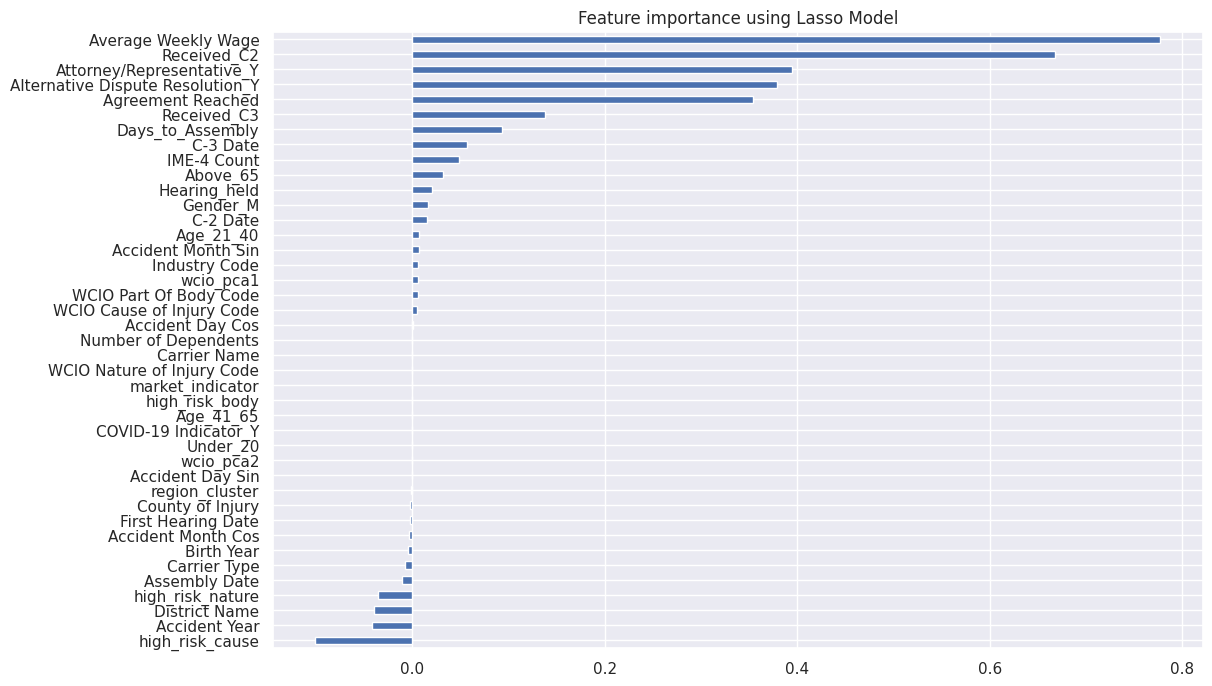

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
#print the features that were eliminated

features_eliminated = coef[coef == 0]
print(f"Features eliminated: \n{features_eliminated.sort_values()}")

plot_importance(coef,'Lasso')

<a class="anchor" id="14th-bullet">

## Final Insights:
    
</a>


| Predictor | Unvariate|  Spearman | Variance information factor (VIF) | BORUTA | Lasso | Mutual Information Class. | What to do? |
| --- | --- | --- | --- |--- |---|---| ---|
| Assembly Date | Keep | Drop? | Drop | Keep | Drop | Drop | Keep |
| Average Weekly Wage | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Birth Year | Keep | Drop | Keep | Keep | Keep | Drop | Keep |
| C-2 Date | Keep | Drop? | Drop | Keep | Keep | Drop | Keep |
| C-3 Date | Keep | Keep | Drop | Keep | Drop | Keep | Keep |
| Carrier Name | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Carrier Type | Keep | Keep | Keep | Keep | Keep | Drop | Keep |
| County of Injury | Keep | Keep | Keep | Drop | Keep | Drop | Drop |
| District Name | Keep | Keep | Keep | Keep | Keep | Drop | Keep |
| First Hearing Date | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| IME-4 Count | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Industry Code | Keep | Drop | Keep | Keep | Keep | Keep | Keep |
| WCIO Cause of Injury Code | Keep | Keep | Keep | Keep | Drop | Keep | Keep |
| WCIO Nature of Injury Code | Keep | Drop? | Keep | Keep | Drop | Keep | Keep |
| WCIO Part Of Body Code | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Agreement Reached | Keep | --- | Keep | Drop | Keep | Keep | Drop |
| Number of Dependents | Keep | Drop | Keep | Drop | Keep | Drop | Drop |
| Accident Year | Keep | Keep | Keep | Keep | Keep | Drop | Keep |
| Received_C2 | Keep | --- | Keep | Keep | Keep | Drop | Keep |
| Received_C3 | Keep | --- | Drop | Keep | Keep | Keep | Keep |
| Hearing_held | Keep | --- | Keep | Keep | Keep | Keep | Keep |
| Attorney/Representative_Y | Keep | --- | Keep | Keep | Keep | Keep | Keep |
| COVID-19 Indicator_Y | Keep | --- | Keep | Keep | Drop | Drop | Keep |
| Alternative Dispute Resolution_Y | Keep | --- | Keep | Keep | Drop | Drop | Keep |
| Gender_M | Keep | --- | Keep | Keep | Keep | Drop | Keep |
| wcio_pca1 | Keep | Drop? | Keep | Keep | Keep | Keep | Keep |
| wcio_pca2 | Keep | Keep | Keep | Keep | Drop | Keep | Keep |
| region_cluster | Keep | Keep | Keep | Keep | Keep | Drop | Keep |
| high_risk_nature | Keep | --- | Drop | Keep | Keep | Keep | Keep |
| high_risk_body | Keep | --- | Keep | Keep | Keep | Drop | Keep |
| high_risk_cause | Keep | --- | Keep | Keep | Drop | Drop | Keep |
| Under_20 | Keep | --- | Keep | Drop | Drop | Drop | Drop |
| Days_to_Assembly | Keep | --- | Keep | Drop | Drop | Keep | Drop |
| Accident Month Cos | Keep | --- | Keep | Drop | Keep | Drop | Drop |
| Age_21_40 | Keep | --- | Drop | Drop | Keep | Drop | Drop |
| Above_65 | Keep | --- | Keep | Drop | Keep | Drop | Drop |
| Accident Day Sin  | Keep | --- | Keep | Drop | Keep | Keep | Drop |
| Age_41_65 | Keep | --- | Drop | Drop | Drop | Drop | Drop |
| Accident Day Cos | Keep | --- | Keep | Drop | Keep | Drop | Drop |
| Accident Month Sin | Keep | --- | Keep | Drop | Keep | Drop | Drop |
| market_indicator | Keep | --- | Drop | Drop | Keep | Drop | Drop |
<hr>


#### From this table and using majority voting with tie-breakers in the Boruta method, it is possible to conclude that the following features will not be included in the model's prediction: 'market_indicator', 'Age_21_40', 'Under_20', COVID-19 Indicator_Y', 'Number of Dependents', 'District Name' and 'Assembly Date'